<a href="https://colab.research.google.com/github/AayushSangani/DL/blob/master/DL_01_J040_071220.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Arabic Alphabets**

In [1]:
!pip install -i https://test.pypi.org/simple/ all-in-one-ml==0.0.3

Looking in indexes: https://test.pypi.org/simple/
  Created wheel for all-in-one-ml: filename=all_in_one_ml-0.0.3-cp36-none-any.whl size=3868 sha256=5d1f9bb6533b5e5fe7ddf7fb51cd282c2da5e03cb1acf4be370653318d03841c
  Stored in directory: /root/.cache/pip/wheels/26/4f/f4/d595e3f4e73e8a49c62b9e2e99856618444f8d4c938d9c1b28
Successfully built all-in-one-ml


In [3]:
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import RMSprop
from keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix

In [4]:
# Ignore  the warnings
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

# Data visualisation and manipulation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
 
# Configuration
# Sets matplotlib to inline and displays graphs below the corressponding cell
%matplotlib inline  
style.use('fivethirtyeight')
sns.set(style='whitegrid',color_codes=True)

# Model selection
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,roc_curve,roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder

# Preprocessing
from keras.preprocessing.image import ImageDataGenerator

# DL libraraies
from keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix
from keras import backend as K
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam, SGD, Adagrad, Adadelta, RMSprop
from keras.utils import to_categorical

# Specifically for CNN
from keras.layers import Dropout, Flatten, Activation, MaxPool2D
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
 
import tensorflow as tf
import random as rn

# Specifically for manipulating zipped images and getting numpy arrays of pixel values of images
import cv2                  
import numpy as np  
from tqdm import tqdm
import os                   
from random import shuffle  
from zipfile import ZipFile
from PIL import Image
from all_in_one_ml import beginner

In [131]:
!wget http://upscfever.com/datasets/csvTrainImages13440x1024.csv -P drive/app
!wget http://upscfever.com/datasets/csvTrainLabel13440x1.csv -P drive/app
!wget http://upscfever.com/datasets/csvTestImages3360x1024.csv -P drive/app
!wget http://upscfever.com/datasets/csvTestLabel3360x1.csv -P drive/app

--2020-12-07 04:25:13--  http://upscfever.com/datasets/csvTrainImages13440x1024.csv
Resolving upscfever.com (upscfever.com)... 104.27.176.133, 172.67.193.2, 104.27.177.133, ...
Connecting to upscfever.com (upscfever.com)|104.27.176.133|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://upscfever.com/datasets/csvTrainImages13440x1024.csv [following]
--2020-12-07 04:25:13--  https://upscfever.com/datasets/csvTrainImages13440x1024.csv
Connecting to upscfever.com (upscfever.com)|104.27.176.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/csv]
Saving to: ‘drive/app/csvTrainImages13440x1024.csv’

csvTrainImages13440     [ <=>                ]  28.22M  --.-KB/s    in 0.1s    

2020-12-07 04:25:13 (215 MB/s) - ‘drive/app/csvTrainImages13440x1024.csv’ saved [29593405]

--2020-12-07 04:25:13--  http://upscfever.com/datasets/csvTrainLabel13440x1.csv
Resolving upscfever.com (upscfever.com)... 104.27.176.1

In [132]:
train_data = pd.read_csv('drive/app/csvTrainImages13440x1024.csv', header = None)
train_label = pd.read_csv('drive/app/csvTrainLabel13440x1.csv', header = None)
test_data = pd.read_csv('drive/app/csvTestImages3360x1024.csv', header = None)
test_label = pd.read_csv('drive/app/csvTestLabel3360x1.csv', header = None)

In [7]:
train_data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,984,985,986,987,988,989,990,991,992,993,994,995,996,997,998,999,1000,1001,1002,1003,1004,1005,1006,1007,1008,1009,1010,1011,1012,1013,1014,1015,1016,1017,1018,1019,1020,1021,1022,1023
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [8]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13440 entries, 0 to 13439
Columns: 1024 entries, 0 to 1023
dtypes: int64(1024)
memory usage: 105.0 MB


In [133]:
train_data = train_data.iloc[:,:].values.astype('float32')
train_label = train_label.iloc[:,:].values.astype('int32')-1
test_data = test_data.iloc[:,:].values.astype('float32')
test_label = test_label.iloc[:,:].values.astype('int32')-1

In [134]:
def row_calculator(number_of_images, number_of_columns):
    if number_of_images % number_of_columns != 0:
        return (number_of_images / number_of_columns)+1
    else:
        return (number_of_images / number_of_columns)


def display_image(x, img_size, number_of_images):
    plt.figure(figsize = (8, 7))
    if x.shape[0] > 0:
        n_samples = x.shape[0]
        x = x.reshape(n_samples, img_size, img_size)
        number_of_rows = row_calculator(number_of_images, 4)
        for i in range(number_of_images):
            plt.subplot(number_of_rows, 4, i+1)
            plt.imshow(x[i])

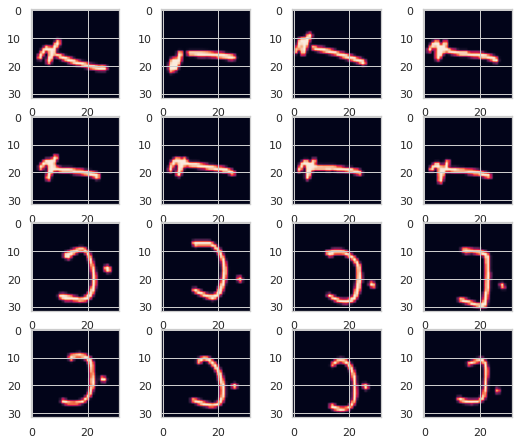

In [135]:
display_image(train_data, 32, 16)

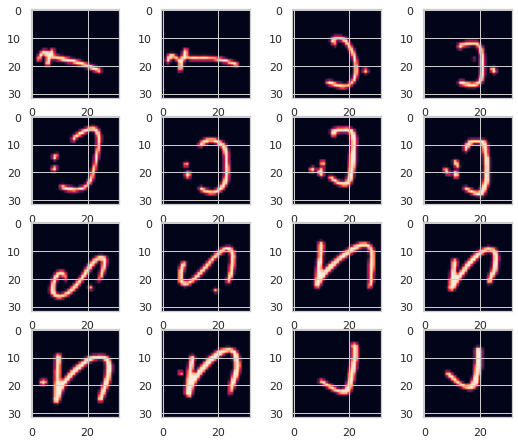

In [136]:
display_image(test_data, 32, 16)

In [11]:
train_label = to_categorical(train_label,28)

In [139]:
train_data = train_data/255
test_data = test_data/255

In [140]:
train_data = train_data.reshape([-1, 32, 32, 1])
test_data = test_data.reshape([-1, 32, 32, 1])

In [14]:
recognizer = Sequential()

recognizer.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', input_shape = (32,32,1)))
recognizer.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
recognizer.add(MaxPool2D(pool_size=(2,2)))
recognizer.add(Dropout(0.25))


recognizer.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
recognizer.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
recognizer.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
recognizer.add(Dropout(0.25))


recognizer.add(Flatten())
recognizer.add(Dense(units = 256, input_dim = 1024, activation = 'relu'))
recognizer.add(Dense(units = 256, activation = "relu"))
recognizer.add(Dropout(0.5))
recognizer.add(Dense(28, activation = "softmax"))

In [15]:
recognizer.summary()
optimizer = RMSprop(lr=0.001, rho=0.9, epsilon=1e-08, decay=0.0)
recognizer.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        832       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        25632     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 64)          0

In [16]:
datagen = ImageDataGenerator(
        featurewise_center=False, 
        samplewise_center=False,  
        featurewise_std_normalization=False,
        samplewise_std_normalization=False,
        zca_whitening=False,
        rotation_range=10,
        zoom_range = 0.1,  
        width_shift_range=0.1, 
        height_shift_range=0.1,
        horizontal_flip=False,
        vertical_flip=False)

val_generator = datagen.flow(train_data,subset='validation')
datagen.fit(train_data)

In [17]:
history = recognizer.fit_generator(datagen.flow(train_data,train_label, batch_size=100), validation_data=val_generator,
                             epochs = 30, verbose = 2, steps_per_epoch=train_data.shape[0] // 100)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/30
134/134 - 3s - loss: 2.5415 - accuracy: 0.2236
Epoch 2/30
134/134 - 3s - loss: 1.4676 - accuracy: 0.5067
Epoch 3/30
134/134 - 3s - loss: 1.0150 - accuracy: 0.6546
Epoch 4/30
134/134 - 3s - loss: 0.7843 - accuracy: 0.7308
Epoch 5/30
134/134 - 3s - loss: 0.6496 - accuracy: 0.7838
Epoch 6/30
134/134 - 3s - loss: 0.5424 - accuracy: 0.8220
Epoch 7/30
134/134 - 3s - loss: 0.4702 - accuracy: 0.8437
Epoch 8/30
134/134 - 3s - loss: 0.4104 - accuracy: 0.8657
Epoch 9/30
134/134 - 3s - loss: 0.3624 - accuracy: 0.8831
Epoch 10/30
134/134 - 3s - loss: 0.3293 - accuracy: 0.8943
Epoch 11/30
134/134 - 3s - loss: 0.3075 - accuracy: 0.9025
Epoch 12/30
134/134 - 3s - loss: 0.2748 - accuracy: 0.9115
Epoch 13/30
134/134 - 3s - loss: 0.2506 - accuracy: 0.9208
Epoch 14/30
134/134 - 3s - loss: 0.2352 - accuracy: 0.9253
Epoch 15/30
134/134 - 3s - loss: 0.2220 - accuracy: 0.9301
Epoch 16/30
134/134 - 3s - loss: 0.2063 - accura

In [141]:
predictions = recognizer.predict(test_data)
predictions = np.argmax(predictions,axis = 1)

In [19]:
cm = confusion_matrix(test_label, predictions)

In [20]:
accuracy = sum(cm[i][i] for i in range(28)) / test_label.shape[0]
print("Accuracy: " + str(accuracy))

Accuracy: 0.9773809523809524


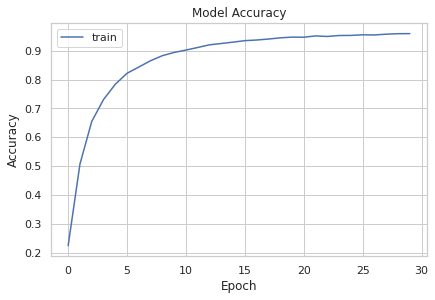

In [21]:
plt.plot(history.history['accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train'], loc='upper left')
plt.show()

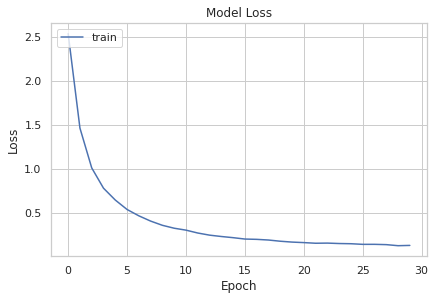

In [22]:
plt.plot(history.history['loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train'], loc='upper left')
plt.show()

In [142]:
from sklearn.metrics import precision_score, recall_score
print('Precision Score: ',precision_score(test_label, predictions, average="macro"))
print('Recall Score: ', recall_score(test_label, predictions, average="macro"))

Precision Score:  0.9777903267824889
Recall Score:  0.9773809523809524


#**Flowers**

In [23]:
# Ignore the warnings
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

# Data visualisation and manipulation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
 
# Configuration
# Sets matplotlib to inline and displays graphs below the corressponding cell
%matplotlib inline  
style.use('fivethirtyeight')
sns.set(style='whitegrid',color_codes=True)

# Model selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,roc_curve,roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder

# Preprocessing
from keras.preprocessing.image import ImageDataGenerator

# DL libraraies
from keras import backend as K
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam,SGD,Adagrad,Adadelta,RMSprop
from keras.utils import to_categorical

# Specifically for CNN
from keras.layers import Dropout, Flatten,Activation
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
 
import tensorflow as tf
import random as rn

# Specifically for manipulating zipped images and getting numpy arrays of pixel values of images.
import cv2                  
import numpy as np  
from tqdm import tqdm
import os                   
from random import shuffle  
from zipfile import ZipFile
from PIL import Image

In [91]:
!wget http://upscfever.com/datasets/flowers-new.zip

--2020-12-07 03:49:22--  http://upscfever.com/datasets/flowers-new.zip
Resolving upscfever.com (upscfever.com)... 104.27.177.133, 104.27.176.133, 172.67.193.2, ...
Connecting to upscfever.com (upscfever.com)|104.27.177.133|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://upscfever.com/datasets/flowers-new.zip [following]
--2020-12-07 03:49:22--  https://upscfever.com/datasets/flowers-new.zip
Connecting to upscfever.com (upscfever.com)|104.27.177.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/zip]
Saving to: ‘flowers-new.zip.1’

flowers-new.zip.1       [        <=>         ]   5.74M  1.10MB/s    in 9.9s    

2020-12-07 03:49:33 (594 KB/s) - ‘flowers-new.zip.1’ saved [6021364]



In [92]:
!unzip flowers-new.zip

Archive:  flowers-new.zip
replace flowers/daisy/100080576_f52e8ee070_n.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: flowers/daisy/100080576_f52e8ee070_n.jpg  
  inflating: flowers/daisy/11642632_1e7627a2cc.jpg  
  inflating: flowers/daisy/15207766_fc2f1d692c_n.jpg  
  inflating: flowers/daisy/21652746_cc379e0eea_m.jpg  
  inflating: flowers/daisy/25360380_1a881a5648.jpg  
  inflating: flowers/daisy/43474673_7bb4465a86.jpg  
  inflating: flowers/daisy/54377391_15648e8d18.jpg  
  inflating: flowers/daisy/5547758_eea9edfd54_n.jpg  
  inflating: flowers/daisy/5673551_01d1ea993e_n.jpg  
  inflating: flowers/daisy/5673728_71b8cb57eb.jpg  
  inflating: flowers/daisy/5794835_d15905c7c8_n.jpg  
  inflating: flowers/daisy/5794839_200acd910c_n.jpg  
  inflating: flowers/daisy/99306615_739eb94b9e_m.jpg  
  inflating: flowers/dandelion/10443973_aeb97513fc_m.jpg  
  inflating: flowers/dandelion/10683189_bd6e371b97.jpg  
  inflating: flowers/dandelion/10919961_0af657c4e8.jpg  
  inflatin

In [94]:
np.random.seed(42)
rn.seed(42)
tf.random.set_seed(42)

In [95]:
images = []
labels = []

In [96]:
IMG_SIZE=150
FLOWER_DAISY_DIR='flowers/daisy'
FLOWER_SUNFLOWER_DIR='flowers/sunflower'
FLOWER_TULIP_DIR='flowers/tulip'
FLOWER_DANDI_DIR='flowers/dandelion'
FLOWER_ROSE_DIR='flowers/rose'

In [97]:
flower_dirs = [FLOWER_DAISY_DIR, FLOWER_SUNFLOWER_DIR, FLOWER_TULIP_DIR, FLOWER_DANDI_DIR, FLOWER_ROSE_DIR]

In [98]:
flowers = ['Daisy', 'Sunflower', 'Tulip', 'Dandelion', 'Rose']

In [99]:
def generate_images(flower, DIR, num=10):  
  for img in tqdm(os.listdir(DIR)):
    img = cv2.imread(DIR + '/' + img)
    img = img.reshape((1,) + img.shape)

    gen_datagen = ImageDataGenerator(
        rotation_range=10,  
          zoom_range = 0.1, 
          width_shift_range=0.2,
          height_shift_range=0.2,
          horizontal_flip=True,  
          rescale = 1/255
    )

    for idx, image_save in enumerate((gen_datagen.flow(img, 
                                                      batch_size=1, 
                                                      save_to_dir = DIR + '/', save_prefix=flower,
                                                      save_format='jpg'))):
      if idx == 30:
        break

In [100]:
for flower, flower_dir in zip(flowers, flower_dirs):
  generate_images(flower, flower_dir)

100%|██████████| 26/26 [00:17<00:00,  1.47it/s]


In [101]:
len(os.listdir(FLOWER_DAISY_DIR))

407

In [102]:
def make_train_data(flower_type,DIR):
    for img in os.listdir(DIR):
        
        path = os.path.join(DIR,img)
        img = cv2.imread(path,cv2.IMREAD_COLOR)
        img = cv2.resize(img, (IMG_SIZE,IMG_SIZE))
        
        images.append(np.array(img))
        labels.append(str(flower_type))

In [103]:
for flower, flower_dir in zip(flowers, flower_dirs):
  make_train_data(flower, flower_dir)

In [104]:
for flower_dir in flower_dirs:
  print(str(len(os.listdir(flower_dir))) + flower_dir)

407flowers/daisy
801flowers/sunflower
798flowers/tulip
804flowers/dandelion
804flowers/rose


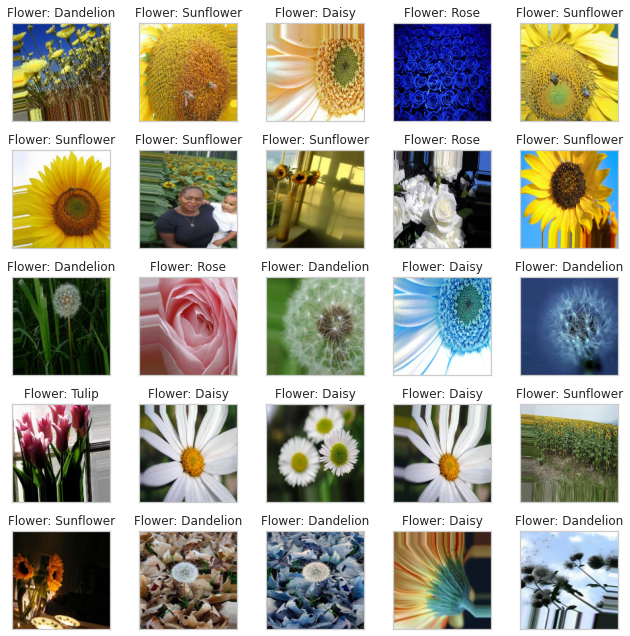

In [105]:
fig, ax = plt.subplots(5,5)
fig.set_size_inches(9,9)

for i in range(5):
  for j in range(5):

    ax[i][j].set_xticks([])
    ax[i][j].set_yticks([])

    l = rn.randint(0,len(labels))
    ax[i][j].imshow(images[l])
    ax[i][j].title.set_text('Flower: '+ labels[l])
    
plt.tight_layout()

In [106]:
le = LabelEncoder()
target = le.fit_transform(labels)
target = to_categorical(target, num_classes = 5)

In [107]:
images = np.array(images)
images = images/255

In [108]:
from sklearn.utils import shuffle
images, target = shuffle(images, target)

In [109]:
x_train, x_test, y_train, y_test = train_test_split(images, target, test_size=0.25, random_state=42)

In [110]:
IMG_HEIGHT = 150
IMG_WIDTH = 150
IMG_SIZE = (IMG_HEIGHT, IMG_WIDTH)

BATCH_SIZE = 100

TRAIN_SIZE = images.shape[0]*0.8
VAL_SIZE = images.shape[0]*0.2

In [111]:
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.2,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.2,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=True,  # randomly flip images horizontally
        rescale = 1/255,
        validation_split=0.2
        )

# datagen.fit(x_train)

In [112]:
train_generator = datagen.flow_from_directory(
    'flowers/',
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training',
    target_size=(256,256),
    shuffle=True
    )

val_generator = datagen.flow_from_directory(
    'flowers/',
    batch_size = BATCH_SIZE,
    subset='validation',
    target_size=(256,256),
    shuffle=True
)

Found 2894 images belonging to 5 classes.
Found 720 images belonging to 5 classes.


In [113]:
# Callbacks
es = EarlyStopping(monitor='val_loss', min_delta=0.0005, patience=6)
mc = ModelCheckpoint('best_weights.h5', monitor='val_loss', save_best_only=True, mode='max')
rd = ReduceLROnPlateau(monitor='val_accuracy', patience=3, verbose=1, mode='auto')

In [114]:
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense

In [115]:
# Modeling the CNN

model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5,5), padding='Same', activation='relu', input_shape=(150,150,3)))
model.add(MaxPool2D(pool_size=(2,2)))
# model.add(Dropout(0.25))

model.add(Conv2D(filters=64, kernel_size=(3,3), padding='Same', activation='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
# model.add(Dropout(0.25))

model.add(Conv2D(filters=96, kernel_size=(3,3),padding='Same', activation='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
# model.add(Dropout(0.15))
model.add(layers.BatchNormalization())

model.add(Conv2D(filters=128, kernel_size=(3,3),padding='Same', activation='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
# model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.30))

model.add(Dense(5, activation='softmax'))

In [120]:
from keras.optimizers import Adam,SGD,Adagrad,Adadelta,RMSprop

In [ ]:
#optimizer = optimizers.RMSProp()

In [122]:
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

In [123]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 150, 150, 32)      2432      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 75, 75, 32)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 75, 75, 64)        18496     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 37, 37, 64)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 37, 37, 96)        55392     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 18, 18, 96)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 18, 18, 96)       

In [124]:
hist = model.fit(x_train, y_train, epochs=100, callbacks=[es, mc, rd], validation_split=0.2)

Epoch 1/100
68/68 [==============================] - 2s 26ms/step - loss: 1.7561 - accuracy: 0.4197 - val_loss: 1.5641 - val_accuracy: 0.3284
Epoch 2/100
68/68 [==============================] - 1s 20ms/step - loss: 0.8584 - accuracy: 0.6720 - val_loss: 1.3707 - val_accuracy: 0.4059
Epoch 3/100
68/68 [==============================] - 1s 21ms/step - loss: 0.6765 - accuracy: 0.7569 - val_loss: 1.0919 - val_accuracy: 0.6328
Epoch 4/100
68/68 [==============================] - 1s 21ms/step - loss: 0.4048 - accuracy: 0.8630 - val_loss: 1.2785 - val_accuracy: 0.5609
Epoch 5/100
68/68 [==============================] - 1s 21ms/step - loss: 0.2810 - accuracy: 0.9161 - val_loss: 0.7192 - val_accuracy: 0.8192
Epoch 6/100
68/68 [==============================] - 1s 21ms/step - loss: 0.2250 - accuracy: 0.9350 - val_loss: 1.4168 - val_accuracy: 0.5221
Epoch 7/100
68/68 [==============================] - 1s 20ms/step - loss: 0.1613 - accuracy: 0.9548 - val_loss: 0.2139 - val_accuracy: 0.9317
Epoch 

In [125]:
pred = model.evaluate(x_test, y_test)

29/29 [==============================] - 0s 8ms/step - loss: 0.2357 - accuracy: 0.9779


##Evaluating Model Performance

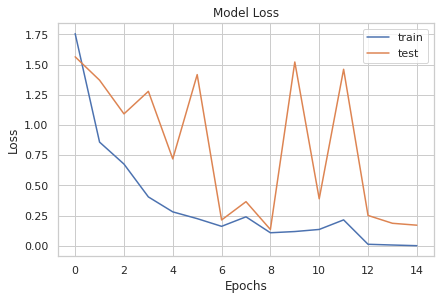

In [126]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

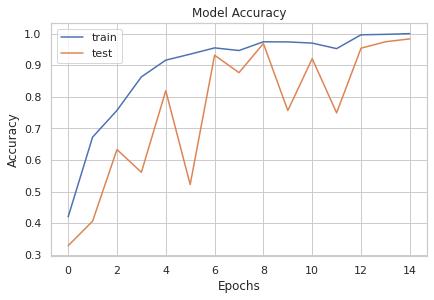

In [127]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

In [144]:
predictions = model.predict(x_test)
predictions = np.argmax(predictions,axis = 1)

In [145]:
y_test_ = to_categorical(y_test)

In [146]:
predictions = to_categorical(predictions,5)

In [147]:
a = np.argmax(predictions,axis=1)
b = np.argmax(y_test,axis=1)

In [148]:
cm = confusion_matrix(a,b)

In [149]:
accuracy = sum(cm[i][i] for i in range(5)) / y_test.shape[0]
print("Accuracy: " + str(accuracy))

Accuracy: 0.9778761061946902


In [150]:
from sklearn.metrics import precision_score, recall_score
print('Precision Score: ',precision_score(y_test, predictions, average="macro"))
print('Recall Score: ', recall_score(y_test, predictions, average="macro")) 

Precision Score:  0.9782999364016979
Recall Score:  0.9732042290014901
